# GPU Accelerated dimensionality reduction with TSNE in online setting

Context: We have a dataset $\mathcal{D}$ of $n$-dimensional vectors that continually grows. What we want is to maintain a TSNE model for dimensionality reduction to 2-dimensions that is fitted to $\mathcal{D}$.

In [2]:
import torch
from tsne_torch import TorchTSNE as TSNE
# Example PyTorch tensor
tensor_data = torch.randn(1000, 50).cuda()  # 1000 samples, 50 features, on GPU

# Apply t-SNE
tsne = TSNE(perplexity=30, n_iter=300, verbose=False)
tsne_results = tsne.fit_transform(tensor_data)

# tsne_results is a PyTorch tensor on GPU
print(tsne_results)

[[-19.82567    6.429161]
 [  8.304232 -22.98125 ]
 [ 12.984289  11.704607]
 ...
 [  3.14165    7.954202]
 [ -9.02894   -5.277506]
 [  7.75434  -15.204917]]


In [1]:
import torch
from openTSNE import TSNE
from openTSNE import initialization

# Initialize a PyTorch tensor
initial_data = torch.randn(500, 50, device='cpu')  # Initial 500 samples, 50 features

# Convert PyTorch tensor to CuPy array
initial_data = initial_data.numpy()

# Initialize t-SNE
tsne = TSNE(perplexity=30, n_iter=300, verbose=True)
init = initialization.pca(initial_data)
embedding = tsne.fit(initial_data, initialization=init)

# Incrementally add new data points
new_data = torch.randn(100, 50, device='cuda')  # New 100 samples, 50 features
new_data = cp.asarray(new_data.cpu().numpy())
embedding.transform(new_data, n_iter=200, inplace=True)

# Convert the final embedding back to PyTorch tensor if needed
final_embedding = torch.tensor(cp.asnumpy(embedding), device='cuda')

print(final_embedding)


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_iter=300, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.10 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=41.67 for 250 iterations...
Iteration   50, KL divergence 2.5094, 50 iterations in 0.5915 sec
Iteration  100, KL divergence 2.5122, 50 iterations in 0.6036 sec
Iteration  150, KL divergence 2.5424, 50 iterations in 0.5573 sec
Iteration  200, KL divergence 2.5532, 50 iterations in 0.5632 sec
Iteration  250, KL divergence 2.6252, 50 iterations in 0.5364 sec
   --> Time elapsed: 2.85 seconds
===> Running optimization with exaggeration=1.00, lr=500.00 for 300 iterations...
Iteration   50, KL divergence 2.1309, 50 iterations in 0.4559 sec
Itera

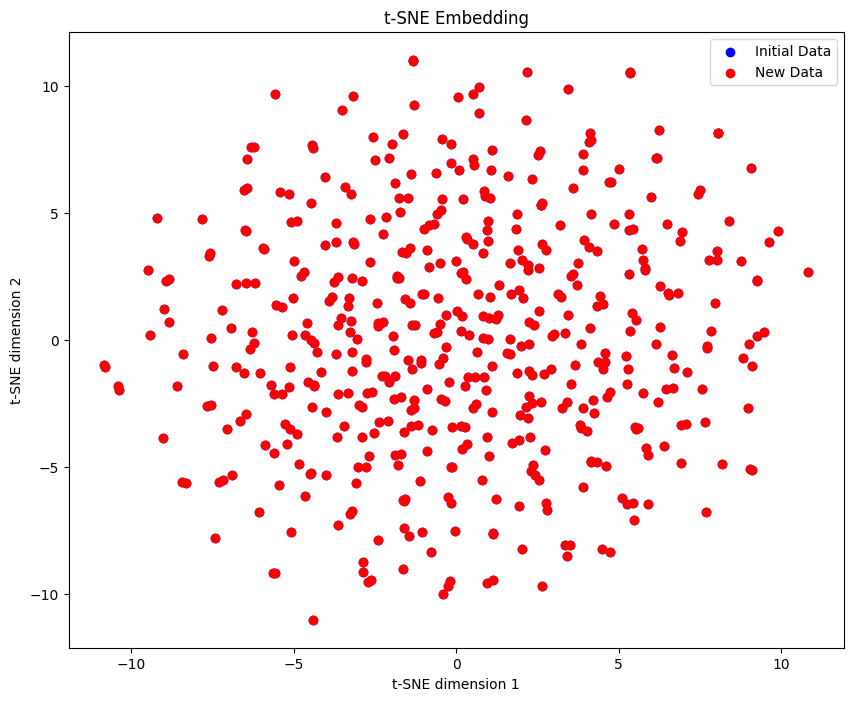

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from openTSNE import TSNE
from openTSNE import initialization

# Initialize a NumPy array
initial_data = np.random.randn(500, 50)  # Initial 500 samples, 50 features

# Initialize t-SNE
tsne = TSNE(perplexity=30, n_iter=300, verbose=True)
init = initialization.pca(initial_data)
embedding = tsne.fit(initial_data, initialization=init)

# Incrementally add new data points
new_data = np.random.randn(100, 50)  # New 100 samples, 50 features
embedding.transform(new_data, n_iter=200)

# The final embedding is a NumPy array
final_embedding = embedding

print(final_embedding)

# Plot the initial embedding
plt.figure(figsize=(10, 8))
# plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', label='Initial Data')
plt.scatter(final_embedding[:, 0], final_embedding[:, 1], c='red', label='New Data')
plt.title('t-SNE Embedding')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.legend()
plt.show()

In [33]:
import gymnasium as gym
import numpy as np

def generate_uniform_samples(lower_bounds, upper_bounds, n_samples):
    """
    Generates uniform random samples within specified lower and upper bounds for each dimension.

    :param lower_bounds: List or array of lower bounds for each dimension.
    :param upper_bounds: List or array of upper bounds for each dimension.
    :param n_samples: Number of samples to generate.
    :return: Array of generated samples with shape (n_samples, input_dim).
    """
    input_dim = len(lower_bounds)
    samples = np.zeros((n_samples, input_dim))
    
    for i in range(input_dim):
        samples[:, i] = np.random.uniform(lower_bounds[i], upper_bounds[i], size=n_samples)
    
    return samples

# Example usage
lower_bounds = [-1, -2, 0]  # Lower bounds for each dimension
upper_bounds = [1, 3, 5]    # Upper bounds for each dimension
n_samples = 10000            # Number of samples to generate

env = gym.make("CartPole-v1")

generated_samples = generate_uniform_samples(env.observation_space.low, env.observation_space.high, n_samples)

print(generated_samples)

[[ 2.62754734e+00 -5.49570609e+37 -6.67584661e-02  1.36301589e+38]
 [-5.19234709e-01  1.76848864e+38  5.61042303e-02  1.37986790e+38]
 [-2.65166656e+00  2.13197877e+38 -1.18117070e-01  1.51558855e+38]
 ...
 [-4.31978477e+00 -3.28802154e+38  3.86778725e-01  1.81199843e+38]
 [-1.24630233e-02  8.11102814e+37 -1.48598820e-01 -9.05578792e+37]
 [-1.26335643e+00 -2.63522366e+38  2.31021622e-01 -7.01363441e+37]]
